Loading Data Loading : Load the retail sales dataset.

In [2]:
import pandas as pd
data = pd.read_csv('retail_sales_dataset.csv')
data.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


Checking the behavior of the dataset to better understand it.

In [3]:
data.shape

(1000, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [5]:
data.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


Analyzing sales trends over time.

In [6]:
data['Year'] = pd.to_datetime(data['Date']).dt.year
data['Month'] = pd.to_datetime(data['Date']).dt.month
data['Day'] = pd.to_datetime(data['Date']).dt.day
print(data[['Date', 'Year', 'Month', 'Day']].head())

         Date  Year  Month  Day
0  2023-11-24  2023     11   24
1  2023-02-27  2023      2   27
2  2023-01-13  2023      1   13
3  2023-05-21  2023      5   21
4  2023-05-06  2023      5    6


In [7]:
data.Year.unique()

array([2023, 2024], dtype=int32)

Graph of Month and year against Total amount.


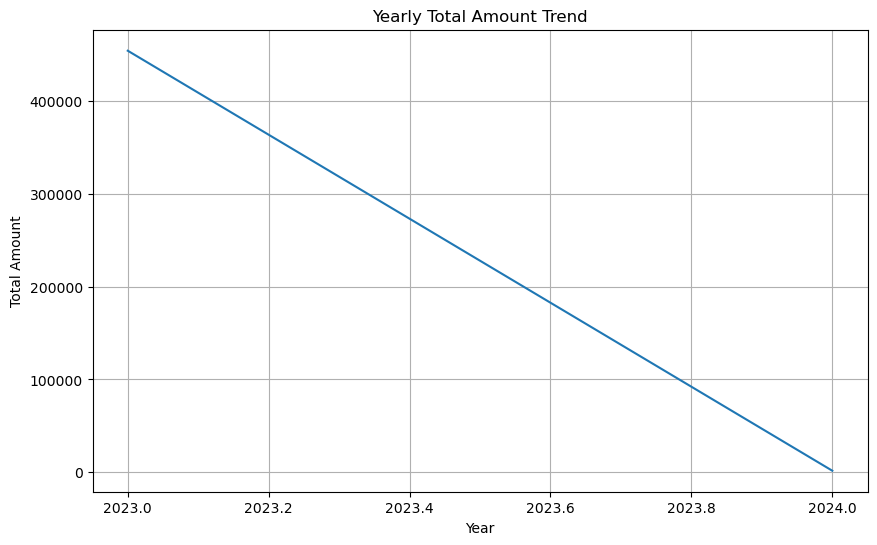

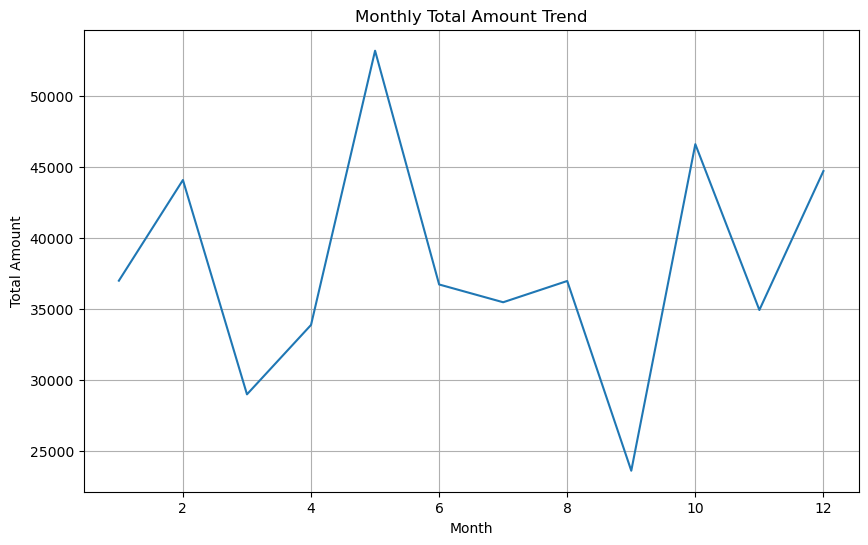

In [8]:
import matplotlib.pyplot as plt

yearly_sales = data.groupby('Year')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales.values)
plt.xlabel('Year')
plt.ylabel('Total Amount')
plt.title('Yearly Total Amount Trend')
plt.grid(True)
plt.show()


monthly_sales = data.groupby('Month')['Total Amount'].sum()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.title('Monthly Total Amount Trend')
plt.grid(True)
plt.show()


Graph of Product Category counts in different Month and year.


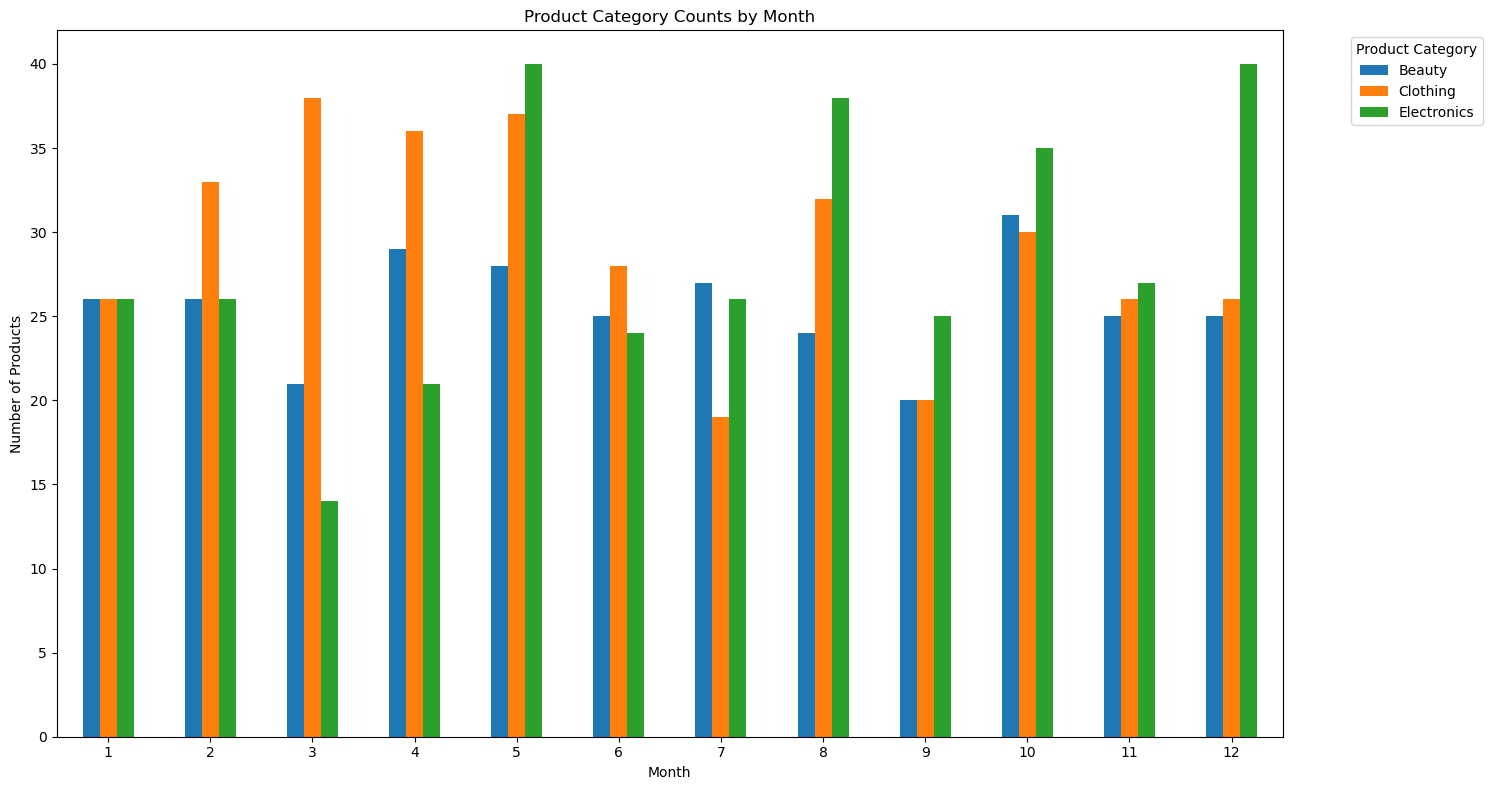

In [9]:
monthly_product_counts = data.groupby(['Month', 'Product Category'])['Product Category'].count().unstack()
monthly_product_counts.plot(kind='bar', figsize=(15, 8))
plt.title('Product Category Counts by Month')
plt.xlabel('Month')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

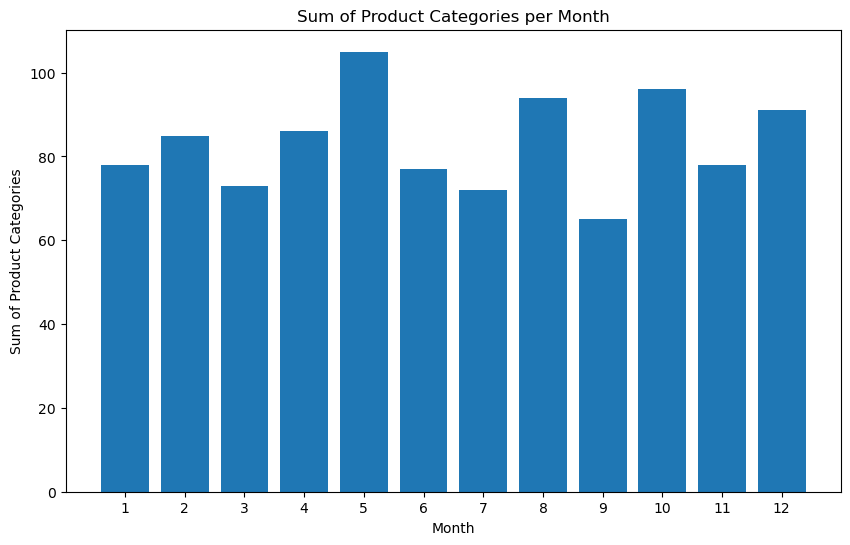

In [10]:
monthly_category_sums = data.groupby('Month')['Product Category'].count()

plt.figure(figsize=(10, 6))
plt.bar(monthly_category_sums.index, monthly_category_sums.values)
plt.xlabel('Month')
plt.ylabel('Sum of Product Categories')
plt.title('Sum of Product Categories per Month')
plt.xticks(monthly_category_sums.index)  
plt.show()

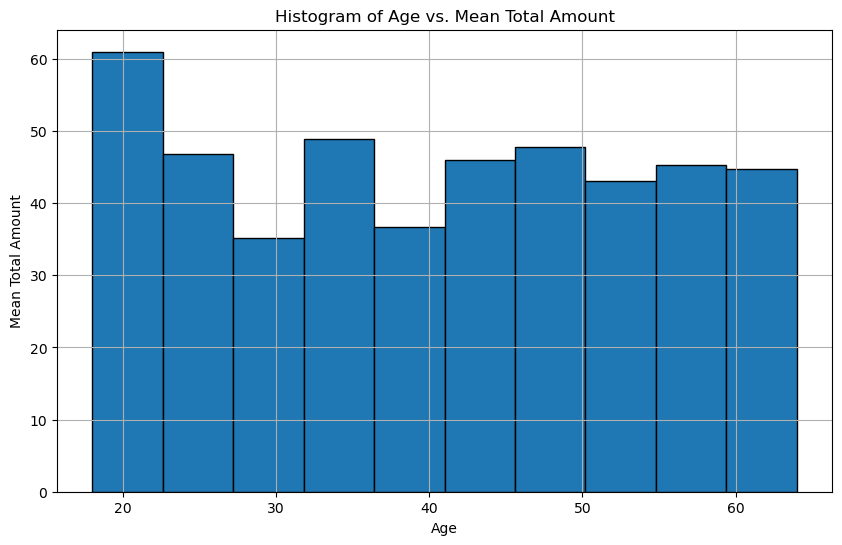

In [11]:
age_mean_total_amount = data.groupby('Age')['Total Amount'].mean()

plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=10, weights=data['Total Amount'] / len(data), edgecolor='black')  # Use weights for mean representation
plt.xlabel('Age')
plt.ylabel('Mean Total Amount')
plt.title('Histogram of Age vs. Mean Total Amount')
plt.grid(True)
plt.show()

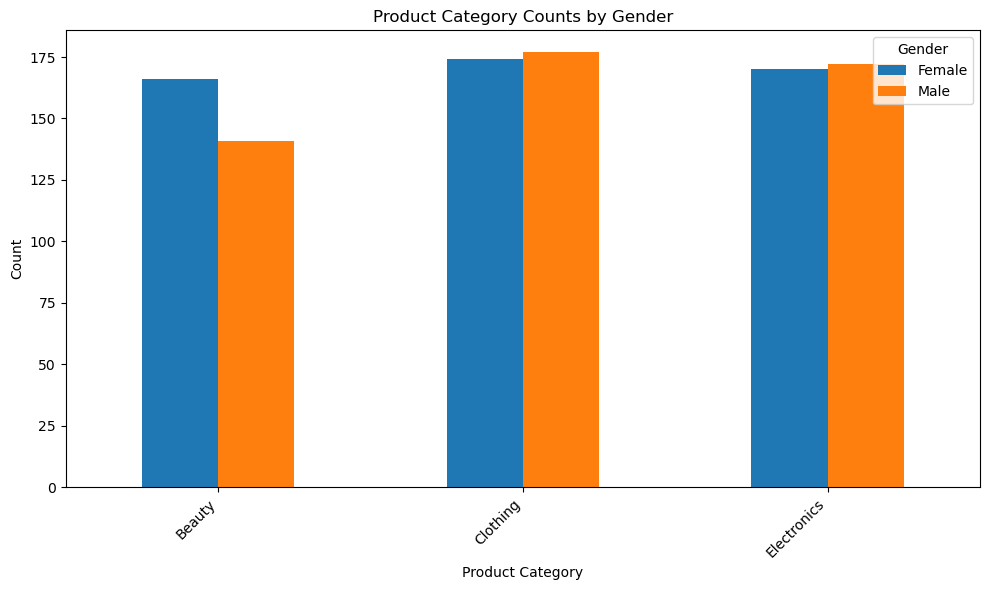

In [12]:
category_gender_counts = data.groupby(['Product Category', 'Gender'])['Product Category'].count().unstack()

category_gender_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Product Category Counts by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.legend(title='Gender')
plt.show()

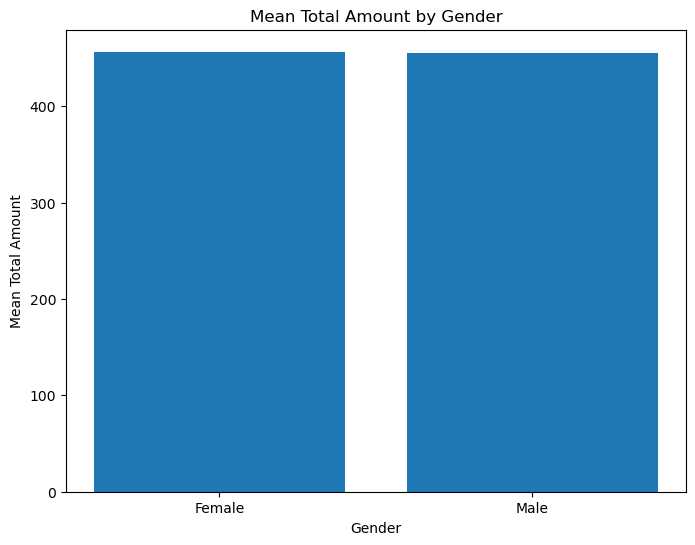

In [13]:
gender_mean_amount = data.groupby('Gender')['Total Amount'].mean()

plt.figure(figsize=(8, 6))
plt.bar(gender_mean_amount.index, gender_mean_amount.values)
plt.xlabel('Gender')
plt.ylabel('Mean Total Amount')
plt.title('Mean Total Amount by Gender')
plt.show()